In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/fcc-forum-pageviews.csv",index_col="date", parse_dates=True)
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]
print(df.head())
print(df)


            value
date             
2016-05-19  19736
2016-05-26  18060
2016-05-27  19997
2016-05-28  19044
2016-05-29  20325
             value
date              
2016-05-19   19736
2016-05-26   18060
2016-05-27   19997
2016-05-28   19044
2016-05-29   20325
...            ...
2019-11-24  138875
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-03  158549

[1238 rows x 1 columns]


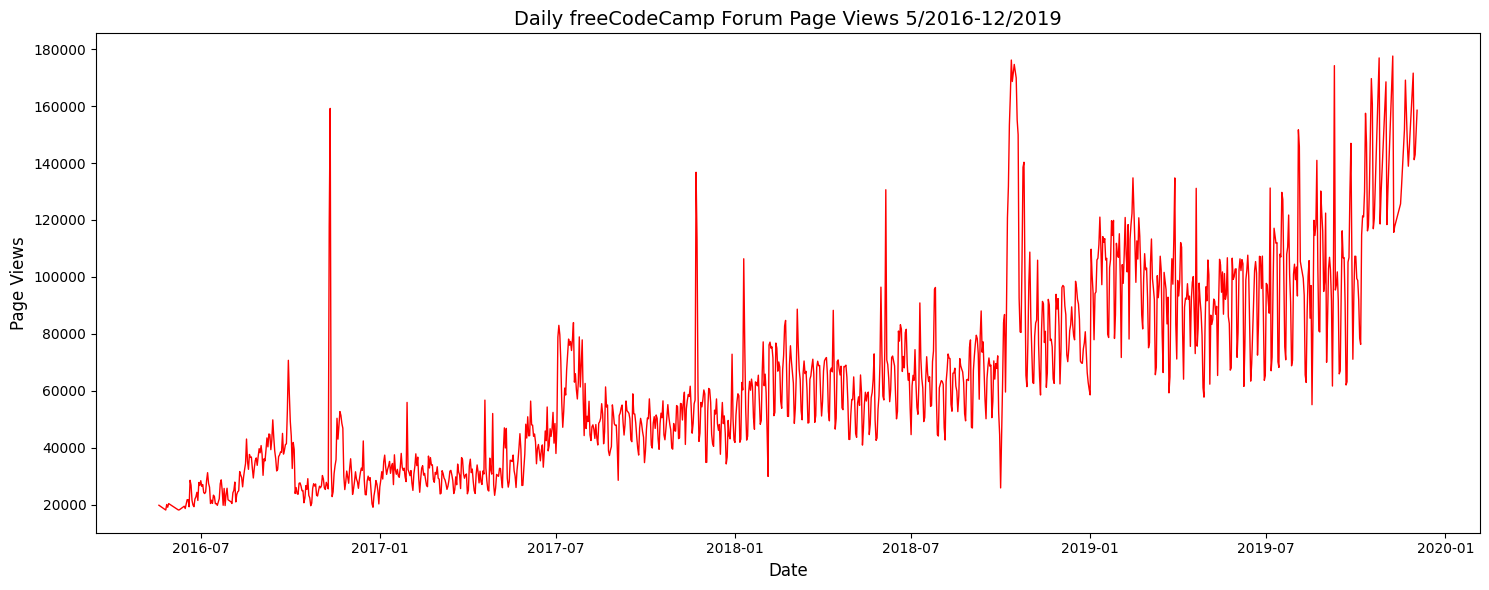

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df["value"], color="red", linewidth=1)
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Page Views", fontsize=12)
plt.tight_layout()
plt.savefig("line_plot.png")
plt.show()

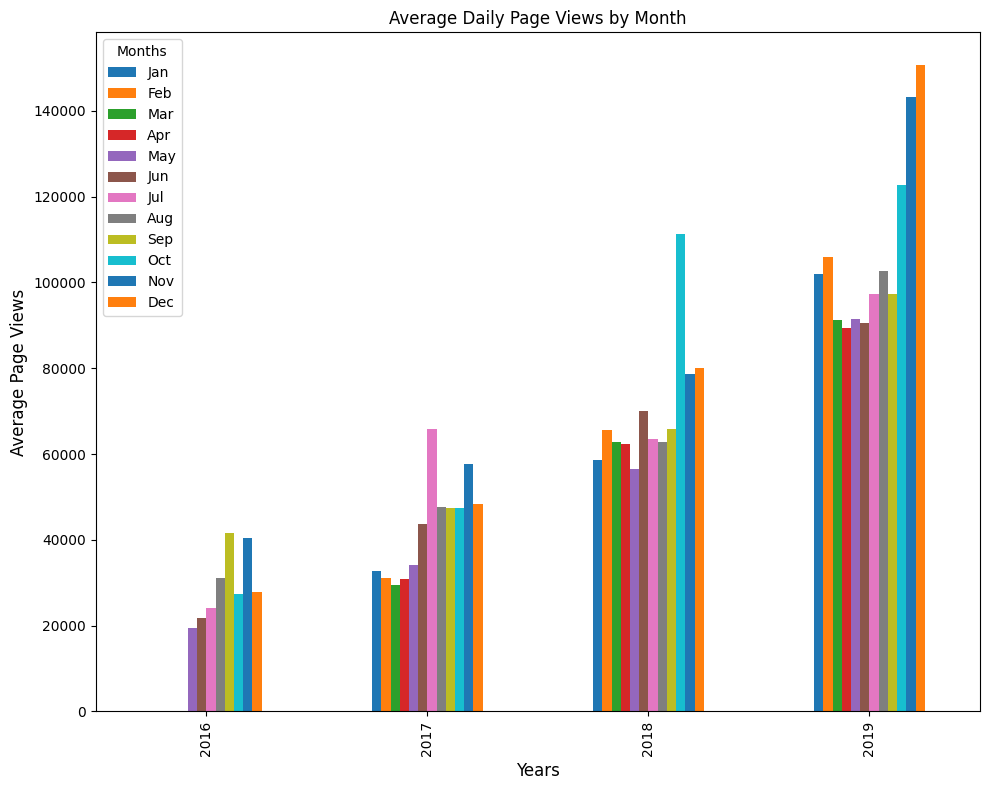

In [ ]:
df_bar = df.copy()
df_bar["year"] = df_bar.index.year
df_bar["month"] = df_bar.index.month
df_bar = df_bar.groupby(["year", "month"])["value"].mean().unstack()

df_bar.plot(kind="bar", figsize=(10, 8), legend=True)
plt.title("Average Daily Page Views by Month")
plt.xlabel("Years", fontsize=12)
plt.ylabel("Average Page Views", fontsize=12)
plt.legend(title="Months", labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.tight_layout()
plt.savefig("bar_plot.png")
plt.show()

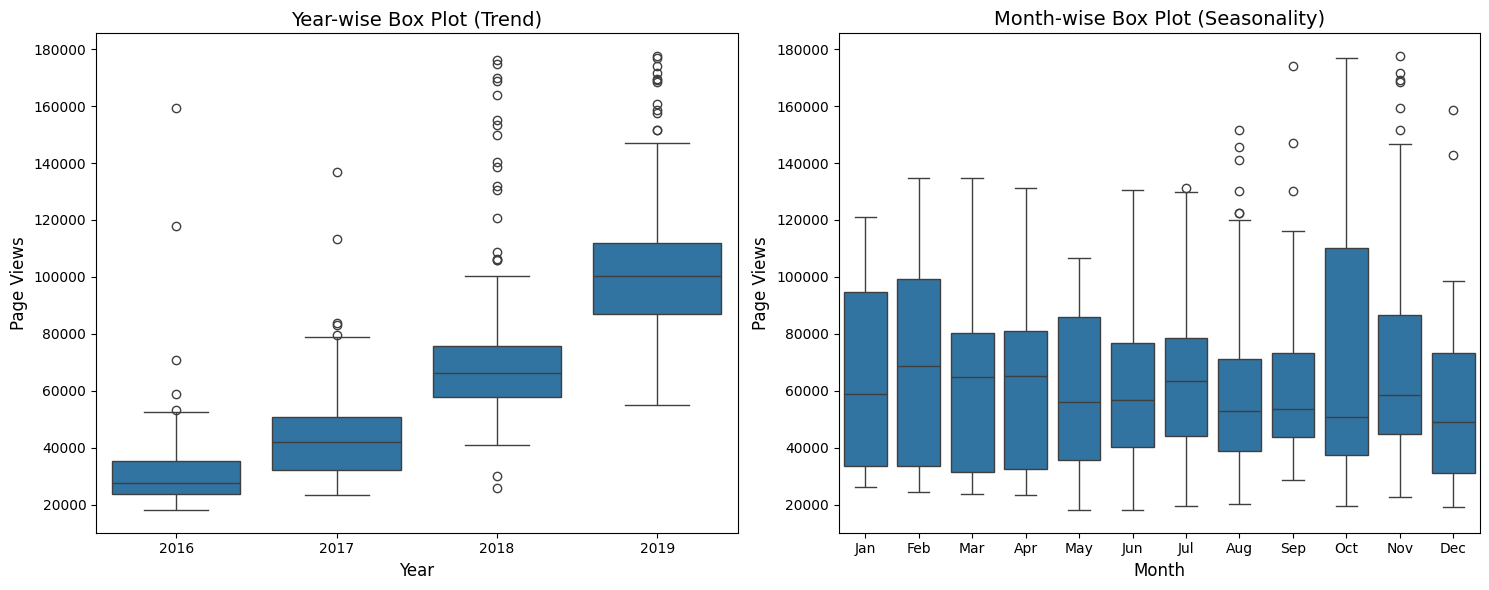

In [ ]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box["year"] = df_box["date"].dt.year
df_box["month"] = df_box["date"].dt.strftime('%b')
df_box["month_num"] = df_box["date"].dt.month
df_box = df_box.sort_values("month_num")

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="year", y="value", data=df_box)
plt.title("Year-wise Box Plot (Trend)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Page Views", fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(x="month", y="value", data=df_box, order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title("Month-wise Box Plot (Seasonality)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Page Views", fontsize=12)

plt.tight_layout()
plt.savefig("box_plot.png")
plt.show()

https://chatgpt.com/c/677aba0b-ee84-800c-b4d5-2951096d50bd

the above link is explanation
